In [6]:
import os
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

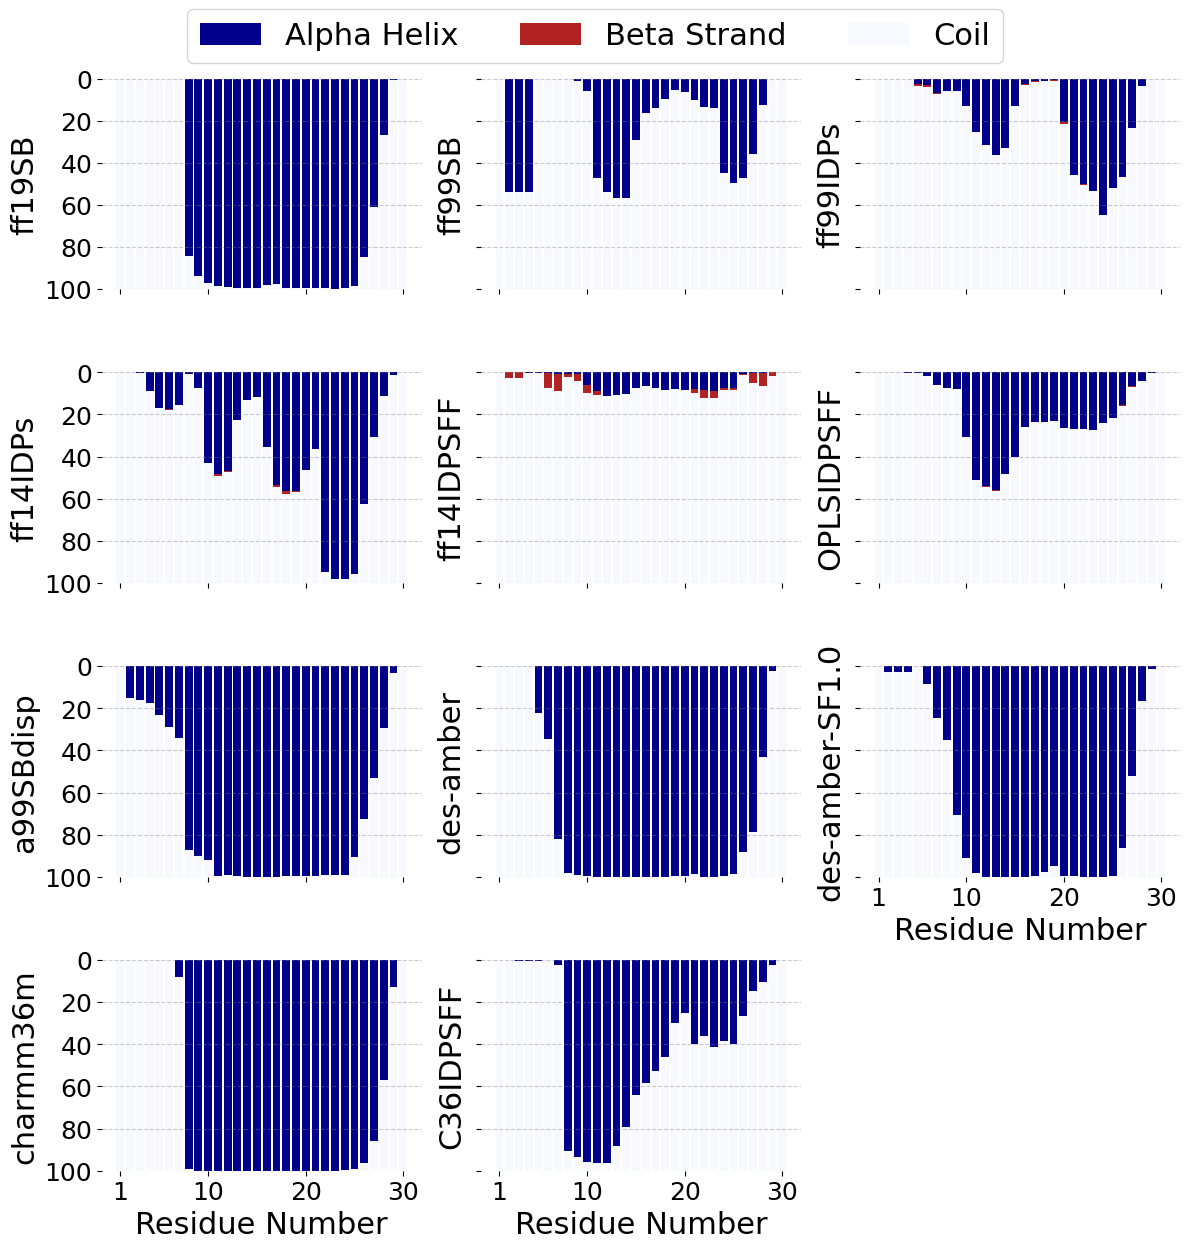

In [34]:
# Label dictionary to categorize structure types
my_label = {0: "None", 1: "Extended", 2: "None", 3: "Alpha", 4: "Alpha", 5: "Alpha", 6: "None", 7: "None"}
# File paths and labels
titles = [
    "ff19SB/analysis/dssp.dat", "ff99SB/analysis/dssp.dat", "ff99IDPs/analysis/dssp.dat",
    "ff14IDPs/analysis/dssp.dat", "ff14IDPSFF/analysis/dssp.dat", "OPLSIDPSFF/production/analysis/dssp.dat",
    "a99SBdisp/production/analysis/dssp.dat", "des-amber/production/analysis/dssp.dat", "des-amber-SF1.0/production/analysis/dssp.dat",
    "charmm36m/analysis/dssp_modified.dat", "charmm36IDPSFF/production/analysis/dssp_modified.dat"
]
file_labels = [
    "ff19SB", "ff99SB", "ff99IDPs", "ff14IDPs", "ff14IDPSFF",
    "OPLSIDPSFF", "a99SBdisp", "des-amber", "des-amber-SF1.0", "charmm36m", "C36IDPSFF"
]
# Color mapping for structure types
color_map = {
    "None": "ghostwhite",
    "Extended": "firebrick",
    "Alpha": "#00008B"
}

# Create figure and 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0.0, wspace=0.2)
# Plot data
for i in range(12):  # Loop over all 12 subplots
    row, col = divmod(i, 3)
    ax = axs[row, col]
    if i < len(titles):
        data = np.loadtxt(titles[i], skiprows=1)[:, 1:31]
        dimx, dimy = data.shape
        x = np.arange(1, dimy + 1)
        # Initialize populations
        population_counts = {'None': np.zeros(dimy), 'Extended': np.zeros(dimy), 'Alpha': np.zeros(dimy)}
        # Count labels
        for label in range(8):
            new_label = my_label[label]
            population_counts[new_label] += (data == label).sum(axis=0)
        # Normalize to %
        total_frames = dimx
        for key in population_counts:
            population_counts[key] = (population_counts[key] / total_frames) * 100
        # Stacked bar plot
        ax.bar(x, population_counts["Alpha"], color=color_map["Alpha"])
        ax.bar(x, population_counts["Extended"], bottom=population_counts["Alpha"], color=color_map["Extended"])
        ax.bar(x, population_counts["None"],
               bottom=population_counts["Alpha"] + population_counts["Extended"],
               color=color_map["None"])
        ax.set_ylabel(file_labels[i], fontsize=22)
    else:
        ax.axis('off')  # Hide unused subplot
# Style and layout
for i, ax in enumerate(axs.flat):
    ax.set_ylim(100, 0)
    ax.set_yticks(np.arange(100, -1, -20))
    ax.tick_params(axis='y', labelsize=18)
    # Remove y-tick labels for non-first-column plots
    if i % 3 != 0:
        ax.set_yticklabels([])
    # Hide top/right/left/bottom spines and add grid
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.4)
# Set x-axis labels only on last row
for ax in axs[3, :]:
    ax.set_xlabel("Residue Number", fontsize=22)
    ax.set_xticks([1, 10, 20, 30])
    ax.tick_params(axis='x', labelsize=18, labelbottom=True)
# Explicitly enable x-tick labels on subplot 8 (index 8 = axs[2, 2])
axs[2, 2].set_xlabel("Residue Number", fontsize=22)
axs[2, 2].set_xticks([1, 10, 20, 30])
axs[2, 2].tick_params(axis='x', labelsize=18, labelbottom=True)
# Add legend on top
fig.legend(["Alpha Helix", "Beta Strand", "Coil"], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), fontsize=22)
# Final layout and save
plt.tight_layout()
plt.savefig('dssp_all.png', bbox_inches='tight', dpi=600)
plt.show()

Dssp plot overall all time frames (4X3 plot)

Data shape for ff19SB/analysis/dssp.dat: (10000, 30)
Data shape for ff99SB/analysis/dssp.dat: (10000, 30)
Data shape for ff99IDPs/analysis/dssp.dat: (10000, 30)
Data shape for ff14IDPs/analysis/dssp.dat: (10000, 30)
Data shape for ff14IDPSFF/analysis/dssp.dat: (10000, 30)
Data shape for OPLSIDPSFF/production/analysis/dssp.dat: (10001, 30)
Data shape for a99SBdisp/production/analysis/dssp.dat: (10001, 30)
Data shape for des-amber/production/analysis/dssp.dat: (10001, 30)
Data shape for des-amber-SF1.0/production/analysis/dssp.dat: (10001, 30)
Data shape for charmm36m/analysis/dssp_modified.dat: (10000, 30)
Data shape for charmm36IDPSFF/production/analysis/dssp_modified.dat: (10002, 30)


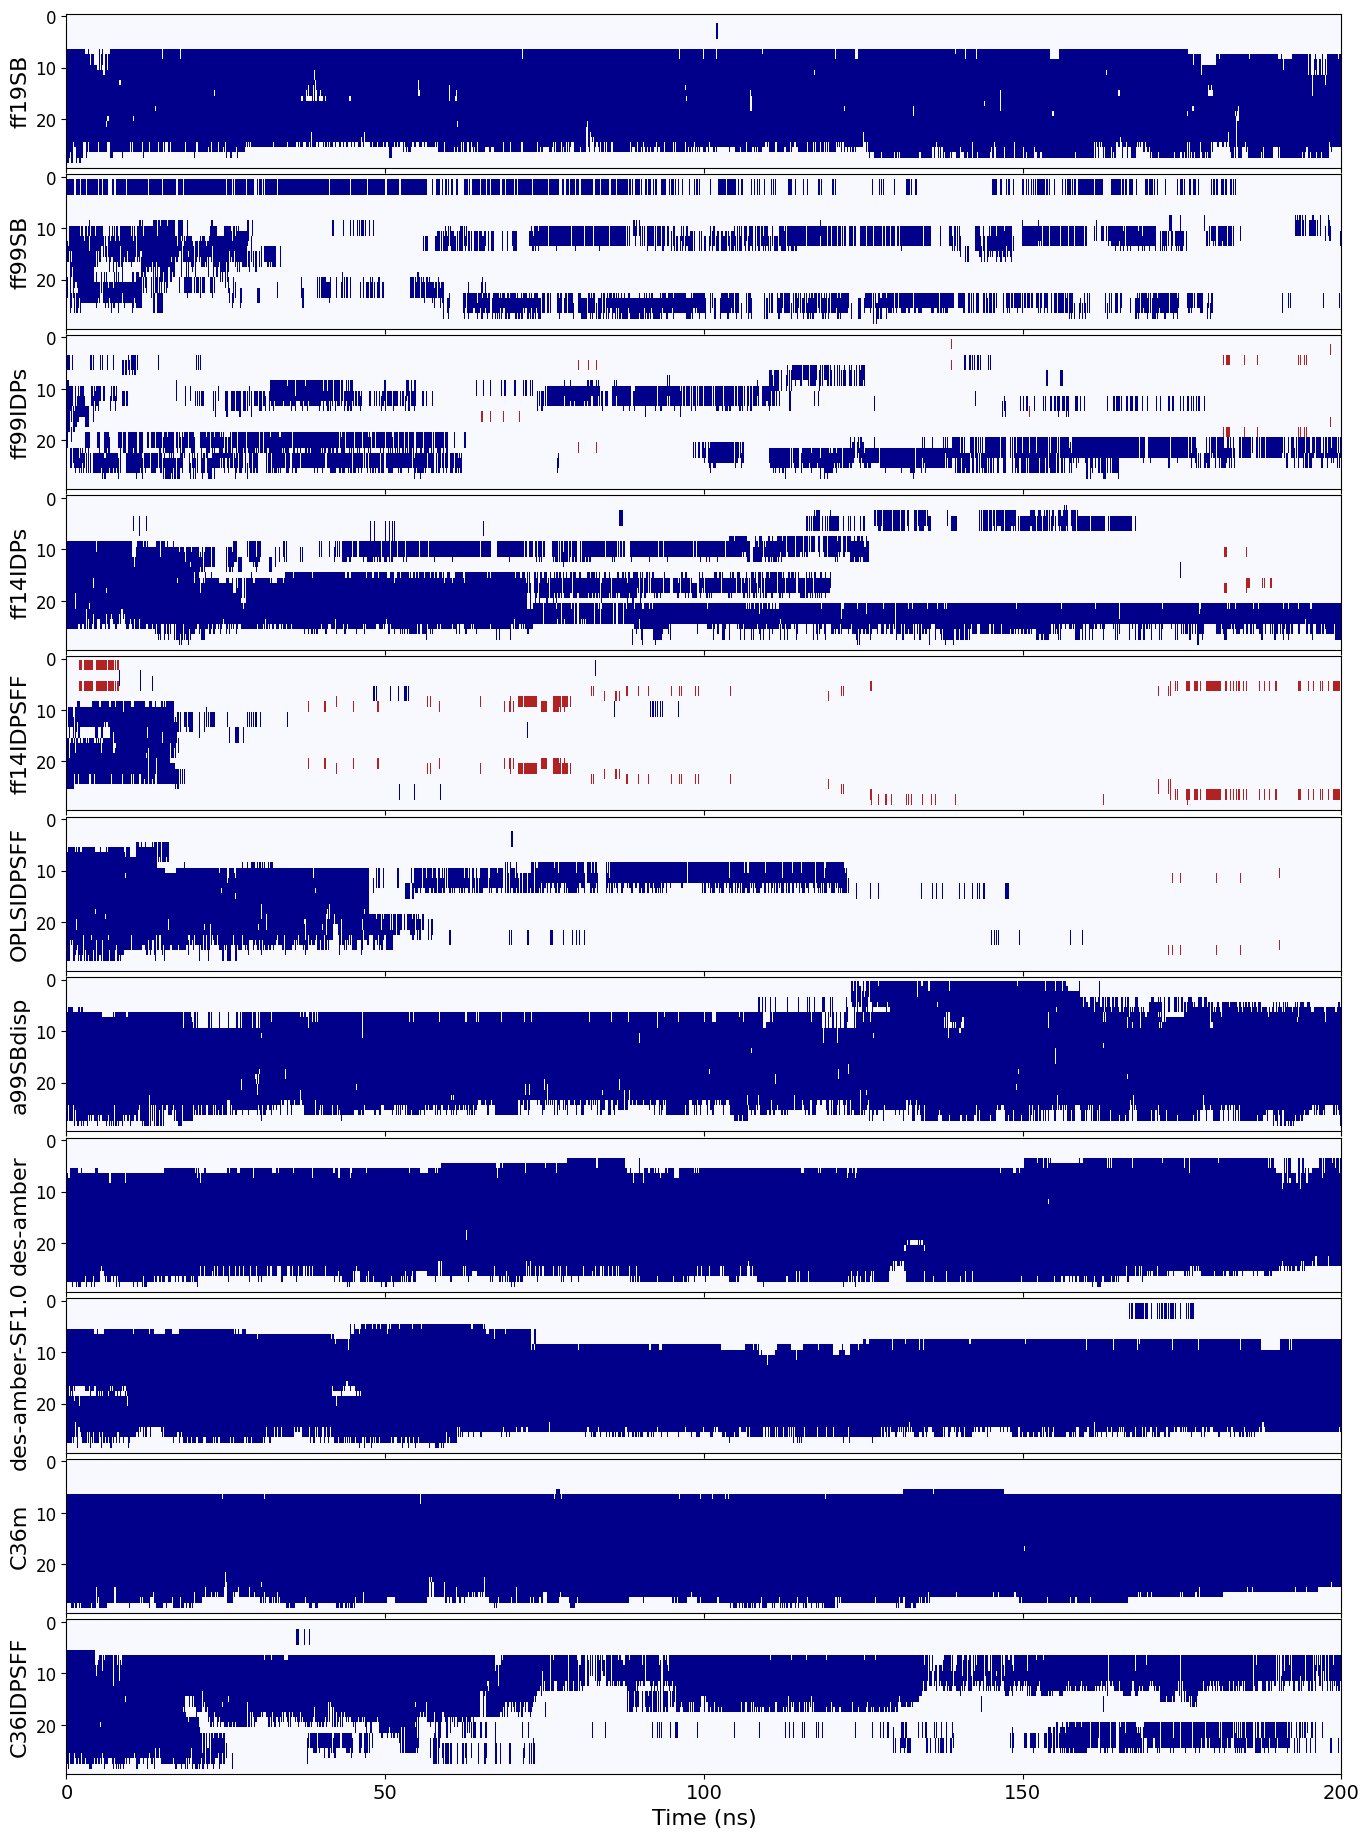

In [10]:
# Label dictionary to categorize structure types
my_label = {
    0: "None", 1: "Extended", 2: "Bridge", 3: "3-10",
    4: "Alpha", 5: "Pi", 6: "Turn", 7: "Bend"
}

# Color mapping for each label
color_map = {
    "None": "ghostwhite",
    "Bridge": "ghostwhite",
    "Turn": "ghostwhite",
    "Bend": "ghostwhite",
    "Extended": "firebrick",
    "3-10": "#00008B",
    "Alpha": "#00008B",
    "Pi": "#00008B"
}

# Create a custom colormap from `color_map`
cmap_colors = [color_map[my_label[i]] for i in range(len(my_label))]
custom_cmap = ListedColormap(cmap_colors)

# Titles for data files and corresponding labels
titles = ["ff19SB/analysis/dssp.dat", "ff99SB/analysis/dssp.dat", "ff99IDPs/analysis/dssp.dat", 
          "ff14IDPs/analysis/dssp.dat", "ff14IDPSFF/analysis/dssp.dat","OPLSIDPSFF/production/analysis/dssp.dat", 
          "a99SBdisp/production/analysis/dssp.dat", "des-amber/production/analysis/dssp.dat", "des-amber-SF1.0/production/analysis/dssp.dat", 
          "charmm36m/analysis/dssp_modified.dat", "charmm36IDPSFF/production/analysis/dssp_modified.dat"]

file_labels = [
    "ff19SB", "ff99SB", "ff99IDPs", "ff14IDPs", "ff14IDPSFF",
    "OPLSIDPSFF", "a99SBdisp", "des-amber", "des-amber-SF1.0",
    "C36m", "C36IDPSFF",
]

# Setup the figure and axes
fig, axs = plt.subplots(len(titles), 1, figsize=(15, len(titles) * 2), sharex=True)
fig.subplots_adjust(hspace=0.04, wspace=0)  # Ensure no space between plots

# Load data and plot
for i, title in enumerate(titles):
    # Load data
    data = np.loadtxt(f'{title}')[:, 1:31]
    print(f"Data shape for {title}: {data.shape}")
    dimx, dimy = data.shape

    # Plot using the custom colormap
    im = axs[i].imshow(
        data.T, cmap=custom_cmap, aspect='auto', interpolation='none',
        vmin=0, vmax=7  # Ensuring the range matches the label indices
    )

    # Set y-axis labels
    axs[i].set_ylabel(file_labels[i], fontsize=16)
    axs[i].tick_params(axis='y', labelsize=12)

    # Hide x-ticks except for the last subplot
    if i < len(titles) - 1:
        axs[i].tick_params(axis='x', labelbottom=False)


for ax in axs:
    # Set the x-axis tick positions to correspond to 0, 2, 4, ..., 10 microseconds
    x_ticks = np.arange(0, 10001, 2500) # Convert microseconds back to original unit
    # Update x-axis tick positions and labels
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{tick}" for tick in np.arange(0, 201, 50)], fontsize=14)
    ax.set_xlabel('Time (ns)', fontsize=16)
    
# Adjust subplot parameters
plt.subplots_adjust(left=0.05, bottom=0.15, top=0.95)  # Adjust margins

# X-axis label for the bottom subplot
#axs[-1].set_xlabel('Simulation Time (microseconds)', fontsize=24)

# Save the figure
plt.savefig('ss_alberto_colored.png', bbox_inches='tight', dpi=600)
plt.show()

CLUSTERING

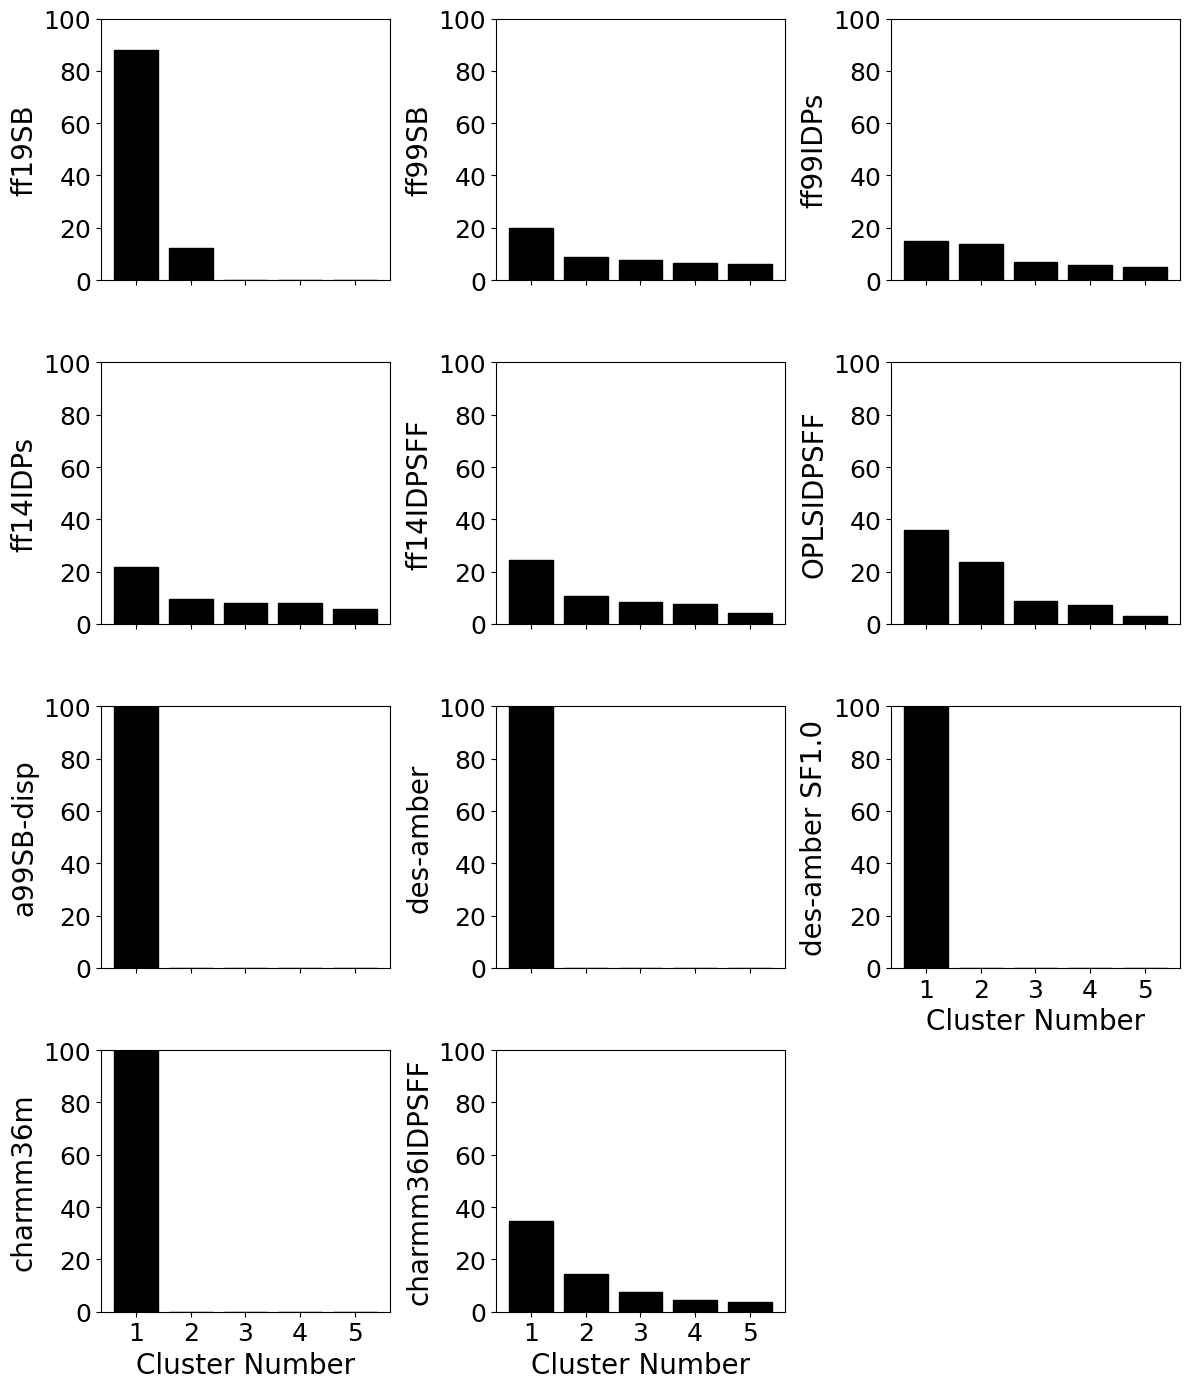

{'ff19SB': [87.8, 12.2, 0, 0, 0], 'ff99SB': [20.1, 8.799999999999999, 7.8, 6.4, 6.1], 'ff99IDPs': [15.0, 13.900000000000002, 6.800000000000001, 5.8999999999999995, 4.9], 'ff14IDPs': [21.7, 9.4, 8.1, 8.0, 5.800000000000001], 'ff14IDPSFF': [24.5, 10.7, 8.5, 7.6, 4.3], 'OPLSIDPSFF': [36.1, 23.599999999999998, 8.6, 7.199999999999999, 3.1], 'a99SB-disp': [100.0, 0, 0, 0, 0], 'des-amber': [100.0, 0, 0, 0, 0], 'des-amber SF1.0': [100.0, 0, 0, 0, 0], 'charmm36m': [100.0, 0, 0, 0, 0], 'charmm36IDPSFF': [34.5, 14.499999999999998, 7.6, 4.3, 3.6999999999999997]}


In [32]:
# Function to read summary files and extract the population data for clusters 0-4
def extract_cluster_populations(ff_dir):
    populations = [0, 0, 0, 0, 0]
    summary_file = os.path.join(ff_dir, 'analysis', 'clustering', 'summary')
    if os.path.exists(summary_file):
        with open(summary_file, 'r') as file:
            for line in file:
                if line.startswith("#Cluster"):
                    continue
                parts = line.split()
                cluster = int(parts[0])
                frac = float(parts[2])
                if 0 <= cluster <= 4:
                    populations[cluster] = frac * 100  # Convert to %
    return populations
# Forcefield directories (update paths as needed)
forcefields = {
    "ff19SB": "ff19SB",
    "ff99SB": "ff99SB",
    "ff99IDPs": "ff99IDPs",
    "ff14IDPs": "ff14IDPs",
    "ff14IDPSFF": "ff14IDPSFF",
    "OPLSIDPSFF": "OPLSIDPSFF/production",
    "a99SB-disp": "a99SBdisp/production",
    "des-amber": "des-amber/production",
    "des-amber SF1.0": "des-amber-SF1.0/production",
    "charmm36m": "charmm36m",
    "charmm36IDPSFF": "charmm36IDPSFF/production",
}
clusters = np.arange(5)  # Clusters 0-4
# Extract data
populations_dict = {ff: extract_cluster_populations(ff_dir) for ff, ff_dir in forcefields.items()}
# Create 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(12, 14), sharex=True)
axs = axs.flatten()
# Plot only first 11 subplots with data
for i, (ff, populations) in enumerate(populations_dict.items()):
    ax = axs[i]
    colors = ['black' for _ in populations]
    ax.bar(clusters, populations, color=colors, edgecolor='black')
    ax.set_ylabel(ff, fontsize=22)
    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 20))
    ax.set_xticks(clusters)
    ax.tick_params(axis='both', labelsize=18)
# Turn off the 12th subplot (make it completely blank)
axs[-1].axis('off')

# Show x-axis labels only for plots 8, 9, 10 (last row)

for i, ax in enumerate(axs[:11]):
    ax.set_xticks(clusters)  # Ensure ticks are set
    if i in [8, 9, 10]:  # Keep labels for bottom row
        ax.set_xlabel("Cluster Number", fontsize=20)
        ax.tick_params(labelbottom=True)
        ax.set_xticklabels(clusters+1, fontsize=18)  # Restore tick labels
    else:
        ax.set_xticklabels([])

for i, ff in enumerate(populations_dict.keys()):
    axs[i].set_ylabel(ff, fontsize=20)

# Final layout and save
plt.tight_layout()
plt.savefig("clusters-folded.png", dpi=600)
plt.show()
# Print cluster populations
print(populations_dict)